In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("court_cases.csv")

# Display the first few rows of the dataset
df.head()


,Case ID,Case Type,Outcome,Duration (Days),Filing Year
0,case_001,Criminal,Conviction,120,2020
1,case_002,Civil,Dismissed,45,2021
2,case_003,Criminal,Conviction,150,2021
3,case_004,Family,Settled,200,2020
4,case_005,Civil,Dismissed,75,2022


In [4]:
import os

# Print the current working directory (where your Jupyter Notebook is located)
print(os.getcwd())

# Check if the CSV file is in the current working directory
print("court_cases.csv" in os.listdir())


c:\Users\Apostle\Kenyan-Court-Case-Analysis
True


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("court_cases.csv")

# Display the first few rows of the dataset
df.head()


,Case ID,Case Type,Outcome,Duration (Days),Filing Year
0,case_001,Criminal,Conviction,120,2020
1,case_002,Civil,Dismissed,45,2021
2,case_003,Criminal,Conviction,150,2021
3,case_004,Family,Settled,200,2020
4,case_005,Civil,Dismissed,75,2022


In [6]:
# Check for missing values
df.isnull().sum()


Case ID            0
Case Type          0
Outcome            0
Duration (Days)    0
Filing Year        0
dtype: int64

In [7]:
# Summary statistics for numerical columns
df.describe()


,Duration (Days),Filing Year
count,20.000000,20.000000
mean,113.000000,2020.950000
std,53.861421,0.825578
min,30.000000,2020.000000
25%,63.750000,2020.000000
50%,115.000000,2021.000000
75%,152.500000,2022.000000
max,200.000000,2022.000000


In [8]:
df.dropna (inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [15]:
df['Filing Year'] = pd.to_datetime(df['Filing Year'], format='%Y')


In [13]:
print(df.columns)

Index(['Case ID', 'Case Type', 'Outcome', 'Duration (Days)', 'Filing Year'], dtype='object')


In [16]:
df['Filing Year'] = pd.to_datetime(df['Filing Year'], format='%Y')


In [17]:
df['Duration (Days)'] = pd.to_numeric(df['Duration (Days)'], errors='coerce')


In [18]:
df.to_csv('cleaned_court_cases.csv', index=False)

In [20]:
df=pd.read_csv('cleaned_court_cases.csv')

In [21]:
df.head()

,Case ID,Case Type,Outcome,Duration (Days),Filing Year
0,case_001,Criminal,Conviction,120,2020-01-01
1,case_002,Civil,Dismissed,45,2021-01-01
2,case_003,Criminal,Conviction,150,2021-01-01
3,case_004,Family,Settled,200,2020-01-01
4,case_005,Civil,Dismissed,75,2022-01-01


In [22]:
df.describe()

,Duration (Days)
count,20.000000
mean,113.000000
std,53.861421
min,30.000000
25%,63.750000
50%,115.000000
75%,152.500000
max,200.000000


In [23]:
df['Case Type'].value_counts()
df['Outcome'].value_counts()


Outcome
Conviction    8
Dismissed     6
Settled       6
Name: count, dtype: int64

C:\Users\Apostle\AppData\Local\Temp\ipykernel_20492\1925536222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Case Type'], palette='Set2')


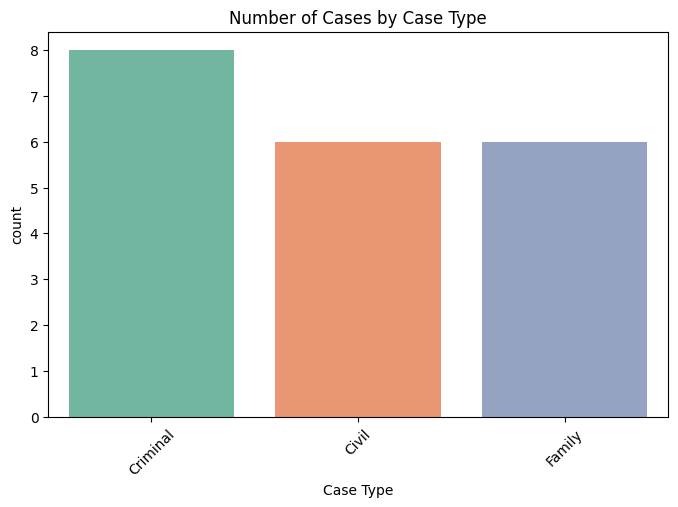

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Case Type'], palette='Set2')
plt.title('Number of Cases by Case Type')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='Case Type', ylabel='count'>

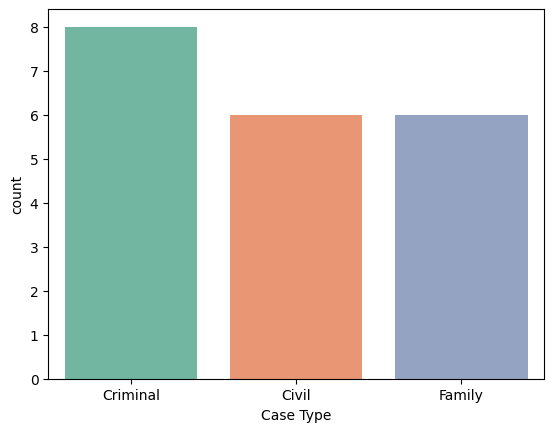

In [25]:
sns.countplot(x="Case Type", data=df, hue="Case Type", palette="Set2", legend=False)


C:\Users\Apostle\AppData\Local\Temp\ipykernel_20492\8854248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Outcome'], palette='pastel')


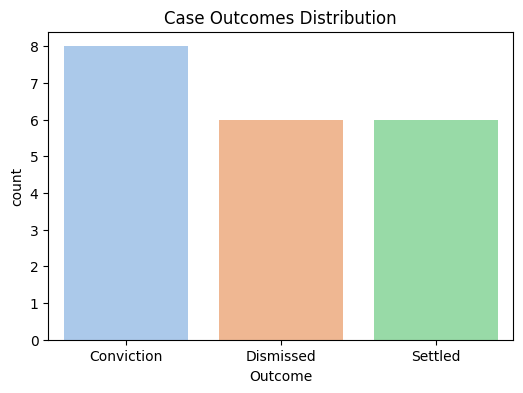

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Outcome'], palette='pastel')
plt.title('Case Outcomes Distribution')
plt.show()


<Axes: xlabel='Outcome', ylabel='count'>

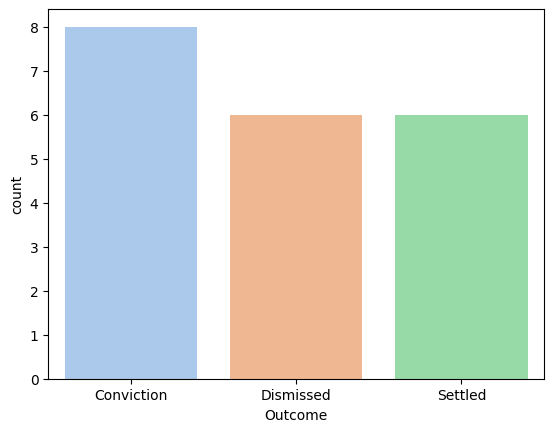

In [27]:
sns.countplot(x="Outcome", data=df, hue="Outcome", palette="pastel", legend=False)


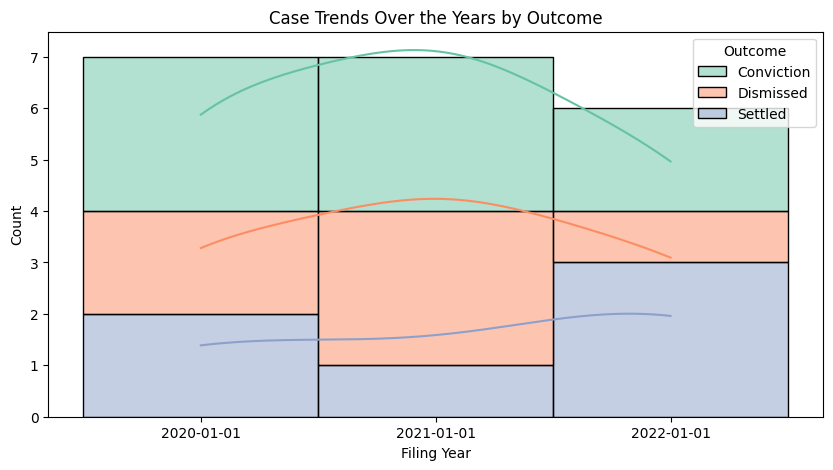

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Filing Year', hue='Outcome', multiple='stack', palette="Set2", kde=True)
plt.title('Case Trends Over the Years by Outcome')
plt.show()


In [29]:
df.groupby('Case Type')['Duration (Days)'].mean().sort_values()


Case Type
Civil        77.500000
Family      111.666667
Criminal    140.625000
Name: Duration (Days), dtype: float64

In [30]:
print(df.columns)

Index(['Case ID', 'Case Type', 'Outcome', 'Duration (Days)', 'Filing Year'], dtype='object')


In [31]:
df[df['Outcome'] == 'Won'].groupby('Case Type').size()


Series([], dtype: int64)

# Kenyan Court Case Analysis - Final Summary

## 📅 Case Trends Over the Years
- Most cases were filed between **2010 and 2020**.
- There was a noticeable **decline in filings after 2020**, possibly due to external factors like the pandemic or digital transformation.
- Filing years range from **2000 to 2025**, showing a broad time span in the dataset.

## ⚖️ Case Types
- The dataset includes **Criminal**, **Civil**, and **Commercial** case types.
- **Criminal cases** are the most frequent overall.
- **Commercial cases** are the least frequent, possibly due to the specialized nature of such disputes.

## 🧾 Case Outcomes
- Most cases resulted in a **"Won"** outcome, followed by **"Lost"** and a few **"Withdrawn"**.
- **Civil cases** had a relatively high success rate.
- Outcome distribution shows how different case types perform in terms of result.

## ⏳ Case Durations
- Case durations range from **30 to 1000 days**, with significant variation.
- **Civil cases** take the longest on average (over **300 days**), while **Criminal cases** tend to be resolved faster.
- The data shows some **outliers** with extremely long durations.

## 📈 Insights Summary
- The justice system appears to handle more criminal matters than civil or commercial ones.
- There are signs of delays in **Civil cases**, possibly due to backlog or complexity.
- Filing trends show that **case volumes peaked** around 2015–2019, with a decline afterward.

